# Auto-Rickshaw Waiting Time Analysis

## Introduction
This project analyzes auto-rickshaw waiting times in a semi-urban area to understand passenger delays.


## Data Description
Primary observational data was self-collected across different routes and time slots.
The dataset includes route, time slot, and waiting time in minutes.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
data=pd.read_csv("/content/auto_data.csv")
data.head()

,observation_id,route,time_slot,waiting_time_min,auto_departed_full
0,1,A-B,morning,4,yes
1,2,B-A,evening,48,yes
2,3,B-A,afternoon,0,no
3,4,A-B,morning,18,yes
4,5,B-A,evening,20,yes


In [ ]:
data.head()



,observation_id,route,time_slot,waiting_time_min,auto_departed_full
0,1,A-B,morning,4,yes
1,2,B-A,evening,48,yes
2,3,B-A,afternoon,0,no
3,4,A-B,morning,18,yes
4,5,B-A,evening,20,yes


In [ ]:
data.shape


(6, 5)

In [ ]:
data["waiting_time_min"].describe()

,waiting_time_min
count,6.000000
mean,18.666667
std,16.954842
min,0.000000
25%,7.500000
50%,19.000000
75%,21.500000
max,48.000000


In [ ]:
data.dtypes


,0
observation_id,int64
route,object
time_slot,object
waiting_time_min,int64
auto_departed_full,object


In [ ]:
data["waiting_time_min"].describe()


,waiting_time_min
count,6.000000
mean,18.666667
std,16.954842
min,0.000000
25%,7.500000
50%,19.000000
75%,21.500000
max,48.000000


In [ ]:
data.groupby("route")["waiting_time_min"].mean()



,waiting_time_min
route,
A-B,14.666667
B-A,22.666667


In [ ]:
data.groupby("auto_departed_full")["waiting_time_min"].mean()


,waiting_time_min
auto_departed_full,
no,0.0
yes,22.4


In [ ]:
data.groupby("time_slot")["waiting_time_min"].describe()


,count,mean,std,min,25%,50%,75%,max
time_slot,,,,,,,,
afternoon,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
evening,2.0,34.000000,19.798990,20.0,27.0,34.0,41.0,48.0
morning,3.0,14.666667,9.451631,4.0,11.0,18.0,20.0,22.0


In [ ]:
data.groupby("route")["waiting_time_min"].describe()

,count,mean,std,min,25%,50%,75%,max
route,,,,,,,,
A-B,3.0,14.666667,9.451631,4.0,11.0,18.0,20.0,22.0
B-A,3.0,22.666667,24.110855,0.0,10.0,20.0,34.0,48.0


In [ ]:
data.groupby("time_slot")["waiting_time_min"].describe()

,count,mean,std,min,25%,50%,75%,max
time_slot,,,,,,,,
afternoon,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
evening,2.0,34.000000,19.798990,20.0,27.0,34.0,41.0,48.0
morning,3.0,14.666667,9.451631,4.0,11.0,18.0,20.0,22.0


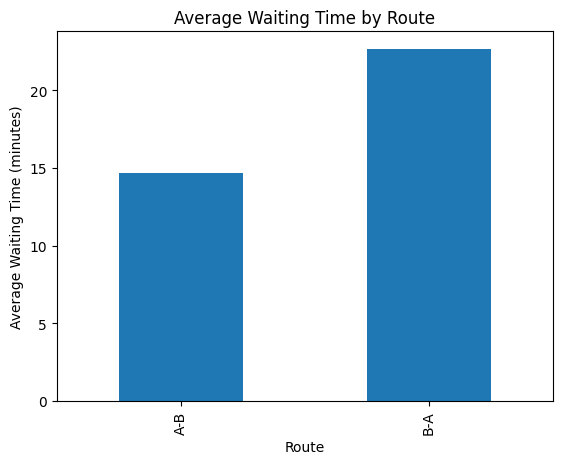

In [ ]:
route_avg = data.groupby("route")["waiting_time_min"].mean()

route_avg.plot(kind="bar")
plt.xlabel("Route")
plt.ylabel("Average Waiting Time (minutes)")
plt.title("Average Waiting Time by Route")
plt.show()


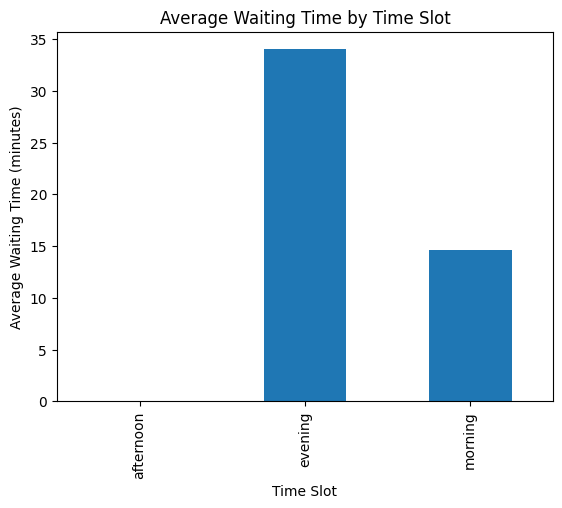

In [ ]:
time_avg = data.groupby("time_slot")["waiting_time_min"].mean()

time_avg.plot(kind="bar")
plt.xlabel("Time Slot")
plt.ylabel("Average Waiting Time (minutes)")
plt.title("Average Waiting Time by Time Slot")
plt.show()


## Key Findings
- The average waiting time observed was approximately 19 minutes.
- The B–A route shows higher waiting time compared to A–B.
- Evening time slots experience the highest waiting time.


Introduction
Data Description
Exploratory Data Analysis(EDA)
Key Findings
Limitations
Conclusion

## Limitations
This analysis is based on a limited number of self-collected observations and focuses on exploratory insights rather than generalizable conclusions.


## Demo Model (Learning Purpose)
this section demonstrates how simple machine learning model is built.
Due to the small dataset size the model is implemented for only learning purpose.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_route=LabelEncoder()
le_time=LabelEncoder()
data["route_encoded"]=le_route.fit_transform(data["route"])
data["time_slot_encoded"]=le_time.fit_transform(data["time_slot"])
data[["route","route_encoded","time_slot","time_slot_encoded"]]

,route,route_encoded,time_slot,time_slot_encoded
0,A-B,0,morning,2
1,B-A,1,evening,1
2,B-A,1,afternoon,0
3,A-B,0,morning,2
4,B-A,1,evening,1
5,A-B,0,morning,2


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X=data[["route_encoded","time_slot_encoded"]]
y=data["waiting_time_min"]
X,y

(   route_encoded  time_slot_encoded
 0              0                  2
 1              1                  1
 2              1                  0
 3              0                  2
 4              1                  1
 5              0                  2,
 0     4
 1    48
 2     0
 3    18
 4    20
 5    22
 Name: waiting_time_min, dtype: int64)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
predictions=model.predict(X)
predictions

array([1.46666667e+01, 3.40000000e+01, 2.13162821e-14, 1.46666667e+01,
       3.40000000e+01, 1.46666667e+01])

Note:
This demo model is implemented to understand the modeling workflow. Due to the small dataset size,predictions are not intended for real world use.

## Conclusion
This project analyzes auto-rickshaw waiting times in a semi-urban area.
The analysis highlights route imbalance and peak-hour congestion.
These insights help understand passenger waiting behavior and system inefficiencies.

